In [1]:
!pip install pandas numpy seaborn matplotlib tensorflow keras sklearn &> /dev/null

In [2]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.metrics import confusion_matrix, classification_report
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.layers import Input, Dense, Flatten
from tensorflow.keras.models import Model
from tensorflow.keras.applications import DenseNet201

import time
start_time = time.time()

In [3]:
PATH_DATA_TRAIN = '../input/cars-data-ttv-80-10-10/data-preprocessed/data-preprocessed/train'
PATH_DATA_TEST = '../input/cars-data-ttv-80-10-10/data-preprocessed/data-preprocessed/test'
PATH_DATA_VALIDATION = '../input/cars-data-ttv-80-10-10/data-preprocessed/data-preprocessed/validation'
PATH_SAVED_MODEL = 'densenet201.h5'

# Load Dataset As Generators

In [4]:
generator = ImageDataGenerator(rescale = 1./255.)

target_size = (100, 100)
batch_size = 32

train_batches = generator.flow_from_directory(
    PATH_DATA_TRAIN, class_mode='categorical', 
    batch_size=batch_size, target_size=target_size
)

validation_batches = generator.flow_from_directory(
    PATH_DATA_VALIDATION, class_mode='categorical',  
    batch_size=batch_size, target_size=target_size
)

test_batches = generator.flow_from_directory(
    PATH_DATA_TEST, class_mode='categorical', shuffle=False, 
    batch_size=batch_size, target_size=target_size
)

Found 12959 images belonging to 7 classes.
Found 1616 images belonging to 7 classes.
Found 1610 images belonging to 7 classes.


In [5]:
# preview data (batch size, width, height, colors)
print('x_train shape:', train_batches[0][0].shape)
print('x_validation shape:', validation_batches[0][0].shape)
print('x_test shape:', test_batches[0][0].shape)
print('y_train shape:', train_batches[0][1].shape)
print('y_validation shape:', validation_batches[0][1].shape)
print('y_test shape:', test_batches[0][1].shape)

x_train shape: (32, 100, 100, 3)
x_validation shape: (32, 100, 100, 3)
x_test shape: (32, 100, 100, 3)
y_train shape: (32, 7)
y_validation shape: (32, 7)
y_test shape: (32, 7)


In [6]:
# input & output shape
input_shape = train_batches[0][0][0].shape
output_shape = len(train_batches[0][1][0])

# display input & output shape
print('Input Shape:', input_shape)
print('Output Shape:', output_shape)

Input Shape: (100, 100, 3)
Output Shape: 7


# Build & Compile Model

In [7]:
model = DenseNet201(
    input_shape=input_shape,
    classes=output_shape,
    weights=None,
    # classifier_activation='softmax'
)

model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])
model.summary()

2022-11-16 13:34:13.678353: I tensorflow/stream_executor/cuda/cuda_gpu_executor.cc:937] successful NUMA node read from SysFS had negative value (-1), but there must be at least one NUMA node, so returning NUMA node zero
2022-11-16 13:34:13.679357: I tensorflow/stream_executor/cuda/cuda_gpu_executor.cc:937] successful NUMA node read from SysFS had negative value (-1), but there must be at least one NUMA node, so returning NUMA node zero
2022-11-16 13:34:13.818620: I tensorflow/stream_executor/cuda/cuda_gpu_executor.cc:937] successful NUMA node read from SysFS had negative value (-1), but there must be at least one NUMA node, so returning NUMA node zero
2022-11-16 13:34:13.819529: I tensorflow/stream_executor/cuda/cuda_gpu_executor.cc:937] successful NUMA node read from SysFS had negative value (-1), but there must be at least one NUMA node, so returning NUMA node zero
2022-11-16 13:34:13.820370: I tensorflow/stream_executor/cuda/cuda_gpu_executor.cc:937] successful NUMA node read from S

Model: "densenet201"
__________________________________________________________________________________________________
Layer (type)                    Output Shape         Param #     Connected to                     
input_1 (InputLayer)            [(None, 100, 100, 3) 0                                            
__________________________________________________________________________________________________
zero_padding2d (ZeroPadding2D)  (None, 106, 106, 3)  0           input_1[0][0]                    
__________________________________________________________________________________________________
conv1/conv (Conv2D)             (None, 50, 50, 64)   9408        zero_padding2d[0][0]             
__________________________________________________________________________________________________
conv1/bn (BatchNormalization)   (None, 50, 50, 64)   256         conv1/conv[0][0]                 
________________________________________________________________________________________

# Train Model

In [8]:
# train model
r = model.fit(train_batches, validation_data=validation_batches, epochs=100)

# save model
model.save(PATH_SAVED_MODEL)

# load model
# model = load_model(PATH_SAVED_MODEL)

2022-11-16 13:34:21.153747: I tensorflow/compiler/mlir/mlir_graph_optimization_pass.cc:185] None of the MLIR Optimization Passes are enabled (registered 2)


Epoch 1/100


2022-11-16 13:34:39.577038: I tensorflow/stream_executor/cuda/cuda_dnn.cc:369] Loaded cuDNN version 8005


405/405 [==============================] - 205s 431ms/step - loss: 1.4839 - accuracy: 0.4311 - val_loss: 3.1428 - val_accuracy: 0.2537
Epoch 2/100
405/405 [==============================] - 119s 292ms/step - loss: 1.0967 - accuracy: 0.5888 - val_loss: 7.4715 - val_accuracy: 0.1225
Epoch 3/100
405/405 [==============================] - 117s 289ms/step - loss: 0.9408 - accuracy: 0.6434 - val_loss: 2.6479 - val_accuracy: 0.3187
Epoch 4/100
405/405 [==============================] - 115s 285ms/step - loss: 0.8249 - accuracy: 0.6855 - val_loss: 6.6206 - val_accuracy: 0.1788
Epoch 5/100
405/405 [==============================] - 117s 289ms/step - loss: 0.7340 - accuracy: 0.7243 - val_loss: 2.8428 - val_accuracy: 0.3707
Epoch 6/100
405/405 [==============================] - 114s 280ms/step - loss: 0.6632 - accuracy: 0.7526 - val_loss: 4.8690 - val_accuracy: 0.1665
Epoch 7/100
405/405 [==============================] - 116s 285ms/step - loss: 0.5856 - accuracy: 0.7761 - val_loss: 2.3808 - val_

# Evaluate Model's Training & Validation Results

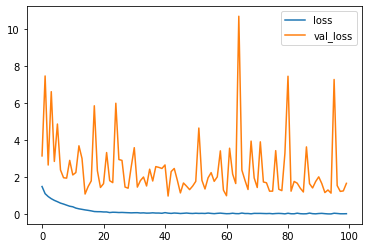

In [9]:
plt.plot(r.history['loss'], label='loss')
plt.plot(r.history['val_loss'], label='val_loss')
plt.legend()

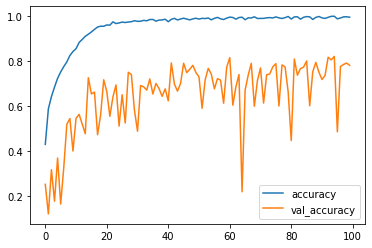

In [10]:
plt.plot(r.history['accuracy'], label='accuracy')
plt.plot(r.history['val_accuracy'], label='val_accuracy')
plt.legend()

# Generate Predictions With Model

In [11]:
y_pred = model.predict(test_batches).argmax(axis=1)

In [12]:
model.evaluate(test_batches)

51/51 [==============================] - 12s 225ms/step - loss: 1.8592 - accuracy: 0.7615


[1.8592274188995361, 0.7614907026290894]

# Evaluate Model's Prediction Results

In [13]:
# generate classification report
class_labels = list(test_batches.class_indices.keys())
report = classification_report(test_batches.classes, y_pred, target_names=class_labels, output_dict=True)
df_classification_report = pd.DataFrame(report).transpose()
df_classification_report

,precision,recall,f1-score,support
hatchback,0.785714,0.493590,0.606299,156.000000
mpv,0.909091,0.648148,0.756757,108.000000
sedan,0.662745,0.816425,0.731602,414.000000
sport,0.797066,0.721239,0.757259,452.000000
suv,0.807692,0.887324,0.845638,284.000000
truck,0.796875,0.956250,0.869318,160.000000
wagon,0.833333,0.277778,0.416667,36.000000
accuracy,0.761491,0.761491,0.761491,0.761491
macro avg,0.798931,0.685822,0.711934,1610.000000
weighted avg,0.771608,0.761491,0.755111,1610.000000


Text(0.5, 69.0, 'Predicted Values')

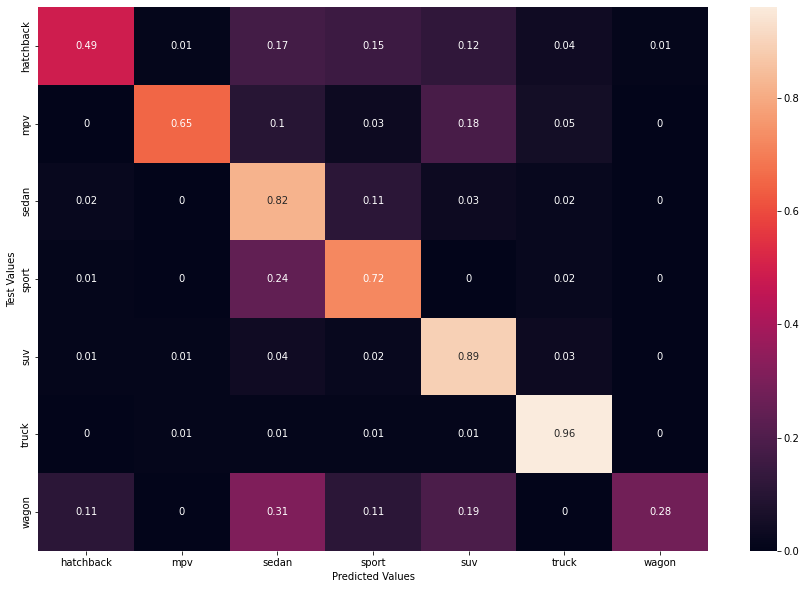

In [14]:
# compute confusion matrix
matrix = confusion_matrix(test_batches.classes, y_pred)

# normalize confusion matrix
matrix = matrix.astype('float') / matrix.sum(axis=1)[:, np.newaxis]
matrix = np.around(matrix, decimals=2)

# generate confusion matrix heatmap
plt.figure(figsize=(15, 10))
sns.heatmap(matrix, annot=True, xticklabels=class_labels, yticklabels=class_labels)
plt.ylabel('Test Values')
plt.xlabel('Predicted Values')

# Compute Execution Time

In [15]:
execution_time_s = round(time.time() - start_time, 2)
execution_time_m = round(execution_time_s/60, 2)
execution_time_h = round(execution_time_m/60, 2)

print('Execution Time (Hours):', execution_time_h)
print('Execution Time (Minutes):', execution_time_m)
print('Execution Time (Seconds):', execution_time_s)

Execution Time (Hours): 3.26
Execution Time (Minutes): 195.36
Execution Time (Seconds): 11721.9
